# 🎯 Regression Models

In [1]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# 🚧 ENVIRONMENT SETUP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from yellowbrick.regressor import PredictionError, ResidualsPlot

df = pd.read_csv('This is it.csv')
df.drop(columns=['Terraced'], inplace=True) #Dropping the "Terraced" feature since it's implicit in the "Detached" column; either a home is terraced or detached. 

In [3]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Duplex,...,Area,Microlocation,Price_log,Area_dummy_1,location_append,Longitude,Latitude,geometry,distances_of_area_from_center,Area_dummy_2
0,0,0,3500000,0,0,0,3,0,0,1,...,Yaba,Akoka,15.068274,1,"Yaba, Lagos",3.382923,6.497892,POINT (3.382923 6.497892),4.288067,24
1,1,1,5000000,0,0,0,4,0,0,1,...,Ikeja,Coker Estate,15.424948,2,"Ikeja, Lagos",3.353204,6.604859,POINT (3.3532040740949824 6.6048591000000005),15.298073,33
2,2,2,100000,0,0,0,5,5,6,1,...,Ikoyi,"...,. Banana Island",11.512925,3,"Ikoyi, Lagos",3.428052,6.452343,POINT (3.4280523 6.4523431),4.405214,35
3,3,3,6000000,0,0,0,5,0,0,1,...,Lekki,Ikate,15.607270,4,"Lekki, Lagos",4.094740,6.412332,POINT (4.0947395 6.4123323),71.193885,30
4,4,4,2200000,0,1,0,4,4,5,1,...,Ajah,Lekki Scheme 2,14.603968,5,"Ajah, Lagos",3.562386,6.469472,POINT (3.5623861 6.4694716),17.888823,18
5,5,5,7000000,0,0,0,4,5,5,1,...,Lekki,Lekki Phase 1,15.761421,4,"Lekki, Lagos",4.094740,6.412332,POINT (4.0947395 6.4123323),71.193885,30
6,6,6,7000000,0,1,0,4,4,5,1,...,Lekki,Lekki Phase 1,15.761421,4,"Lekki, Lagos",4.094740,6.412332,POINT (4.0947395 6.4123323),71.193885,30
7,7,7,3000000,0,0,0,4,0,0,1,...,Apapa,Costain,14.914123,6,"Apapa, Lagos",3.368373,6.445187,POINT (3.3683731679424094 6.445187000000001),1.853626,32
8,8,8,3000000,0,1,0,4,4,5,1,...,Ajah,Ilaje,14.914123,5,"Ajah, Lagos",3.562386,6.469472,POINT (3.5623861 6.4694716),17.888823,18
9,9,9,5000000,0,0,0,4,4,5,1,...,Lekki,Chevron,15.424948,4,"Lekki, Lagos",4.094740,6.412332,POINT (4.0947395 6.4123323),71.193885,30


### Scatterplots
First, some exploratory data analysis. 

C:\Users\laure\AppData\Local\Temp\ipykernel_9468\92246008.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(ylabels)


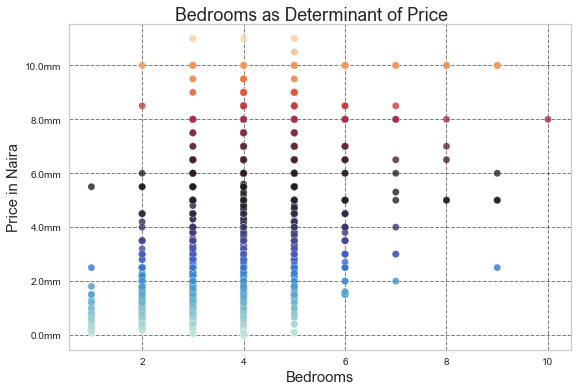

In [4]:
# 🚧 BEDROOMS/PRICE

fig = plt.figure(figsize=(9, 6))

fig.suptitle('Bedrooms as Determinant of Price', x=0.5, y=0.92, ha='center', size=18, font='Arial Nova')

axes = sns.scatterplot(data=df, x='Bedrooms', y='Price',linewidth=0.2, edgecolor="white", alpha=0.8, hue='Price', palette='icefire', legend=False)

sns.set(style='darkgrid')

axes.set_xlabel('Bedrooms', font='Arial Nova', size='15')
axes.set_ylabel('Price in Naira', font='Arial Nova', size='15')

ymajtick = np.arange(0, 15000000, 2000000)
ymintick = np.arange(0, 15000000, 1000000)

ylabels = ['{:,.1f}'.format(y) + 'mm' for y in axes.get_yticks()/1000000]
axes.set_yticklabels(ylabels)

axes.grid(color="black", which = "major", linestyle = "--", linewidth = 1, alpha = 0.5);
axes.grid(color="gray", which = "minor", linestyle = ":", linewidth = 0.5, alpha = 1);

C:\Users\laure\AppData\Local\Temp\ipykernel_9468\3232926815.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(a)
C:\Users\laure\AppData\Local\Temp\ipykernel_9468\3232926815.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(ylabels)


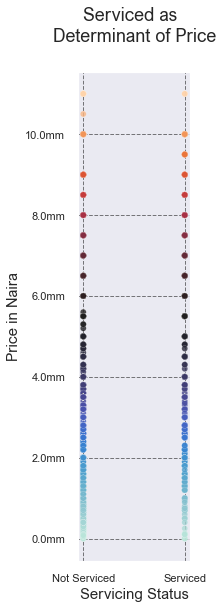

In [5]:
# 🚧 SERVICED/PRICE

fig = plt.figure(figsize=(2, 9))

fig.suptitle('Serviced as \n Determinant of Price', x=0.5, y=0.98, ha='center', size=18, font='Arial Nova')

axes = sns.scatterplot(data=df, x='Serviced', y='Price', linewidth=0.2, edgecolor="white", alpha=0.8, hue='Price', palette='icefire', legend=False)

sns.set(style='darkgrid')

axes.set_ylabel('Price in Naira', font='Arial Nova', size='15')
axes.set_xlabel('Servicing Status', font='Arial Nova', size='15')

ymajtick = np.arange(0, 15000000, 2000000)
ymintick = np.arange(0, 15000000, 1000000)

a=axes.get_xticks().tolist()
a[1]='serviced'
axes.set_yticklabels(a)

xticks = [0, 1]
xticklabels = ['Not Serviced', 'Serviced']
plt.xticks(xticks, xticklabels)
ylabels = ['{:,.1f}'.format(x) + 'mm' for x in axes.get_yticks()/1000000]
axes.set_yticklabels(ylabels)

axes.grid(color="black", which = "major", linestyle = "--", linewidth = 1, alpha = 0.5);
axes.grid(color="gray", which = "minor", linestyle = ":", linewidth = 0.5, alpha = 1);

C:\Users\laure\AppData\Local\Temp\ipykernel_9468\1273675228.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(a)
C:\Users\laure\AppData\Local\Temp\ipykernel_9468\1273675228.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(ylabels)


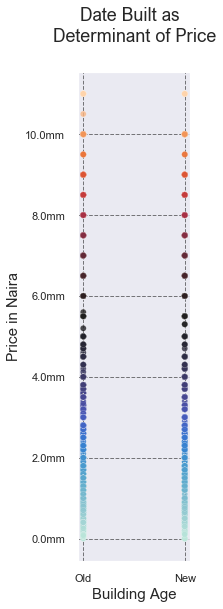

In [6]:
# 🚧 DATE BUILT / PRICE

fig = plt.figure(figsize=(2, 9))

fig.suptitle('Date Built as \n Determinant of Price', x=0.5, y=0.98, ha='center', size=18, font='Arial Nova')

axes = sns.scatterplot(data=df, x='Newly Built', y='Price', linewidth=0.2, edgecolor="white", alpha=0.8, hue='Price', palette='icefire', legend=False)

sns.set(style='darkgrid')

axes.set_ylabel('Price in Naira', font='Arial Nova', size='15')
axes.set_xlabel('Building Age', font='Arial Nova', size='15')

ymajtick = np.arange(0, 15000000, 2000000)
ymintick = np.arange(0, 15000000, 1000000)

a=axes.get_xticks().tolist()
a[1]='serviced'
axes.set_yticklabels(a)

xticks = [0, 1]
xticklabels = ['Old', 'New']
plt.xticks(xticks, xticklabels)
ylabels = ['{:,.1f}'.format(x) + 'mm' for x in axes.get_yticks()/1000000]
axes.set_yticklabels(ylabels)

axes.grid(color="black", which = "major", linestyle = "--", linewidth = 1, alpha = 0.5);
axes.grid(color="gray", which = "minor", linestyle = ":", linewidth = 0.5, alpha = 1);

C:\Users\laure\AppData\Local\Temp\ipykernel_9468\4258771058.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(a)
C:\Users\laure\AppData\Local\Temp\ipykernel_9468\4258771058.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(ylabels)


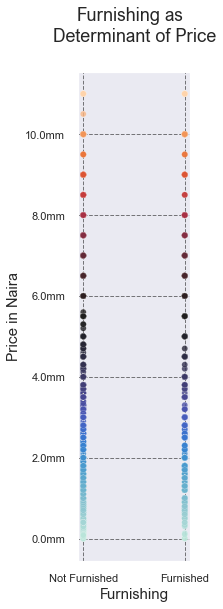

In [7]:
# 🚧 FURNISHING / PRICE

fig = plt.figure(figsize=(2, 9))

fig.suptitle('Furnishing as \n Determinant of Price', x=0.5, y=0.98, ha='center', size=18, font='Arial Nova')

axes = sns.scatterplot(data=df, x='Furnished', y='Price', linewidth=0.2, edgecolor="white", alpha=0.8, hue='Price', palette='icefire', legend=False)

sns.set(style='darkgrid')

axes.set_ylabel('Price in Naira', font='Arial Nova', size='15')
axes.set_xlabel('Furnishing', font='Arial Nova', size='15')

ymajtick = np.arange(0, 15000000, 2000000)
ymintick = np.arange(0, 15000000, 1000000)

a=axes.get_xticks().tolist()
a[1]='serviced'
axes.set_yticklabels(a)

xticks = [0, 1]
xticklabels = ['Not Furnished', 'Furnished']
plt.xticks(xticks, xticklabels)
ylabels = ['{:,.1f}'.format(x) + 'mm' for x in axes.get_yticks()/1000000]
axes.set_yticklabels(ylabels)

axes.grid(color="black", which = "major", linestyle = "--", linewidth = 1, alpha = 0.5);
axes.grid(color="gray", which = "minor", linestyle = ":", linewidth = 0.5, alpha = 1);

C:\Users\laure\AppData\Local\Temp\ipykernel_9468\3592902153.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(ylabels)


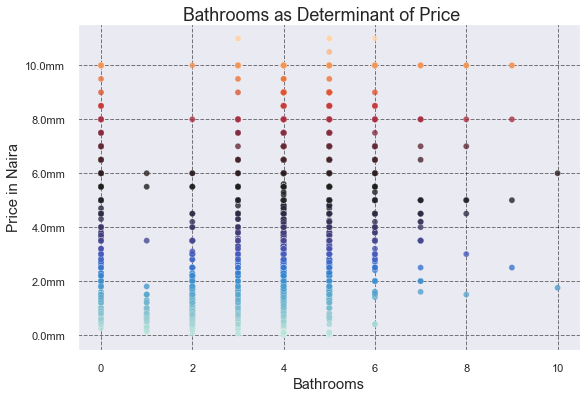

In [8]:
# 🚧 BATHROOMS / PRICE

fig = plt.figure(figsize=(9, 6))

fig.suptitle('Bathrooms as Determinant of Price', x=0.5, y=0.92, ha='center', size=18, font='Arial Nova')

axes = sns.scatterplot(data=df, x='Bathrooms', y='Price', linewidth=0.2, edgecolor="white", alpha=0.8, hue='Price', palette='icefire', legend=False)

sns.set(style='darkgrid')

axes.set_xlabel('Bathrooms', font='Arial Nova', size='15')
axes.set_ylabel('Price in Naira', font='Arial Nova', size='15')

ymajtick = np.arange(0, 15000000, 2000000)
ymintick = np.arange(0, 15000000, 1000000)

axes.set_xticks
ylabels = ['{:,.1f}'.format(x) + 'mm' for x in axes.get_yticks()/1000000]
axes.set_yticklabels(ylabels)

axes.grid(color="black", which = "major", linestyle = "--", linewidth = 1, alpha = 0.5);
axes.grid(color="gray", which = "minor", linestyle = ":", linewidth = 0.5, alpha = 1);

C:\Users\laure\AppData\Local\Temp\ipykernel_9468\1264411204.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(ylabels)


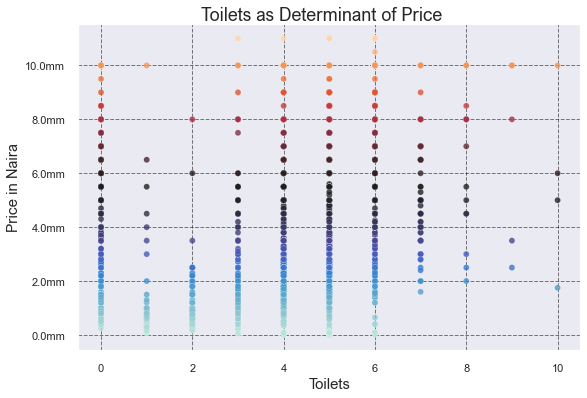

In [9]:
# 🚧 TOILETS / PRICE
fig = plt.figure(figsize=(9, 6))

fig.suptitle('Toilets as Determinant of Price', x=0.5, y=0.92, ha='center', size=18, font='Arial Nova')

axes = sns.scatterplot(data=df, x='Toilets', y='Price', linewidth=0.2, edgecolor="white", alpha=0.8, hue='Price', palette='icefire', legend=False)

sns.set(style='darkgrid')

axes.set_xlabel('Toilets', font='Arial Nova', size='15')
axes.set_ylabel('Price in Naira', font='Arial Nova', size='15')

ymajtick = np.arange(0, 15000000, 2000000)
ymintick = np.arange(0, 15000000, 1000000)

axes.set_xticks
ylabels = ['{:,.1f}'.format(x) + 'mm' for x in axes.get_yticks()/1000000]
axes.set_yticklabels(ylabels)

axes.grid(color="black", which = "major", linestyle = "--", linewidth = 1, alpha = 0.5);
axes.grid(color="gray", which = "minor", linestyle = ":", linewidth = 0.5, alpha = 1);

C:\Users\laure\AppData\Local\Temp\ipykernel_9468\2795217035.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(a)
C:\Users\laure\AppData\Local\Temp\ipykernel_9468\2795217035.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(ylabels)


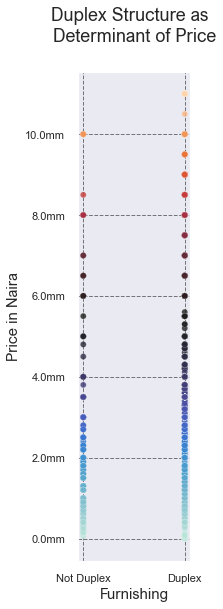

In [10]:
# 🚧 DUPLEX / PRICE

fig = plt.figure(figsize=(2, 9))

fig.suptitle('Duplex Structure as \n Determinant of Price', x=0.5, y=0.98, ha='center', size=18, font='Arial Nova')

axes = sns.scatterplot(data=df, x='Duplex', y='Price', linewidth=0.2, edgecolor="white", alpha=0.8, hue='Price', palette='icefire', legend=False)

sns.set(style='darkgrid')

axes.set_ylabel('Price in Naira', font='Arial Nova', size='15')
axes.set_xlabel('Furnishing', font='Arial Nova', size='15')

ymajtick = np.arange(0, 15000000, 2000000)
ymintick = np.arange(0, 15000000, 1000000)

a=axes.get_xticks().tolist()
a[1]='serviced'
axes.set_yticklabels(a)

xticks = [0, 1]
xticklabels = ['Not Duplex', 'Duplex']
plt.xticks(xticks, xticklabels)
ylabels = ['{:,.1f}'.format(x) + 'mm' for x in axes.get_yticks()/1000000]
axes.set_yticklabels(ylabels)

axes.grid(color="black", which = "major", linestyle = "--", linewidth = 1, alpha = 0.5);
axes.grid(color="gray", which = "minor", linestyle = ":", linewidth = 0.5, alpha = 1);

C:\Users\laure\AppData\Local\Temp\ipykernel_9468\823736011.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(a)
C:\Users\laure\AppData\Local\Temp\ipykernel_9468\823736011.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(ylabels)


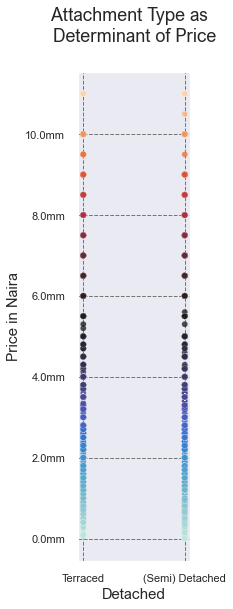

In [11]:
# 🚧 ATTACHMENT / PRICE

fig = plt.figure(figsize=(2, 9))

fig.suptitle('Attachment Type as \n Determinant of Price', x=0.5, y=0.98, ha='center', size=18, font='Arial Nova')

axes = sns.scatterplot(data=df, x='Detached', y='Price', linewidth=0.2, edgecolor="white", alpha=0.8, hue='Price', palette='icefire', legend=False)

sns.set(style='darkgrid')

axes.set_ylabel('Price in Naira', font='Arial Nova', size='15')
axes.set_xlabel('Detached', font='Arial Nova', size='15')

ymajtick = np.arange(0, 15000000, 2000000)
ymintick = np.arange(0, 15000000, 1000000)

a=axes.get_xticks().tolist()
a[1]='serviced'
axes.set_yticklabels(a)

xticks = [0, 1]
xticklabels = ['Terraced', '(Semi) Detached']
plt.xticks(xticks, xticklabels)
ylabels = ['{:,.1f}'.format(x) + 'mm' for x in axes.get_yticks()/1000000]
axes.set_yticklabels(ylabels)

axes.grid(color="black", which = "major", linestyle = "--", linewidth = 1, alpha = 0.5);
axes.grid(color="gray", which = "minor", linestyle = ":", linewidth = 0.5, alpha = 1);

C:\Users\laure\AppData\Local\Temp\ipykernel_9468\1477494225.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(a)
C:\Users\laure\AppData\Local\Temp\ipykernel_9468\1477494225.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(ylabels)


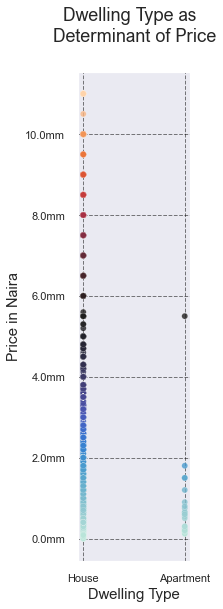

In [12]:
# 🚧 DWELLING TYPE / PRICE

# Dwelling against Price
fig = plt.figure(figsize=(2, 9))

fig.suptitle('Dwelling Type as \n Determinant of Price', x=0.5, y=0.98, ha='center', size=18, font='Arial Nova')

axes = sns.scatterplot(data=df, x='Apartment', y='Price', linewidth=0.2, edgecolor="white", alpha=0.8, hue='Price', palette='icefire', legend=False)

sns.set(style='darkgrid')

axes.set_ylabel('Price in Naira', font='Arial Nova', size='15')
axes.set_xlabel('Dwelling Type', font='Arial Nova', size='15')

ymajtick = np.arange(0, 15000000, 2000000)
ymintick = np.arange(0, 15000000, 1000000)

a=axes.get_xticks().tolist()
a[1]='serviced'
axes.set_yticklabels(a)

xticks = [0, 1]
xticklabels = ['House', 'Apartment']
plt.xticks(xticks, xticklabels)
ylabels = ['{:,.1f}'.format(x) + 'mm' for x in axes.get_yticks()/1000000]
axes.set_yticklabels(ylabels)

axes.grid(color="black", which = "major", linestyle = "--", linewidth = 1, alpha = 0.5);
axes.grid(color="gray", which = "minor", linestyle = ":", linewidth = 0.5, alpha = 1);

### Regressions

##### Univariate Regressions (Linear, Elastic Net, Lasso, Ridge)

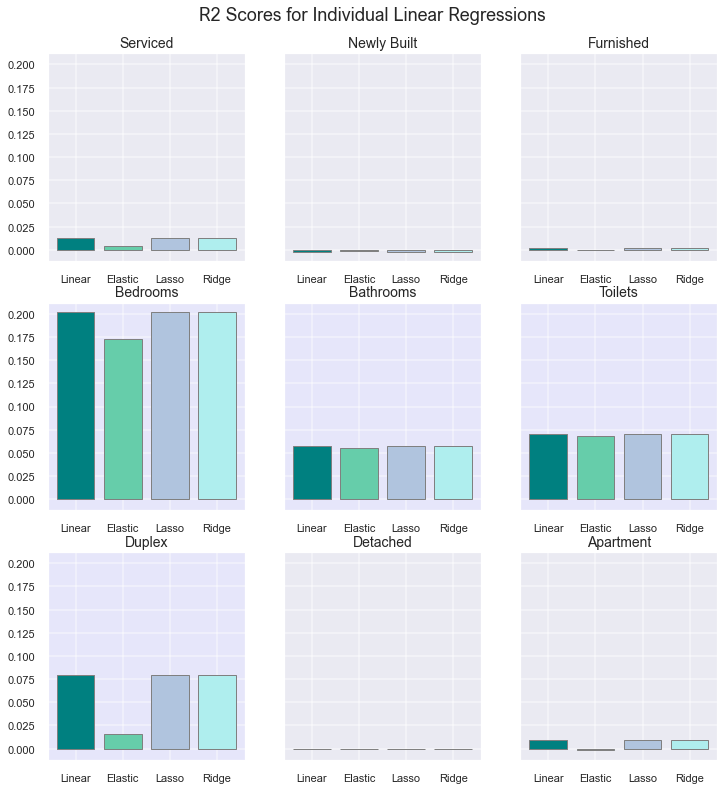

In [13]:
# 🚧 CHECK WHICH FEATURES HAVE THE MOST PREDICTIVE POWER BY THEMSELVES

# Import
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

## Sidenote: we omit 'terraced' and 'house' since they are implied in the 'detached' and 'apartment' variables. 

# Regressions for Bedrooms
df_x1 = df[['Bedrooms']]
df_y = df[['Price']]

R2_bedrooms = []

estimators = {
    'LinRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for estimator_name, estimator_object in estimators.items(): 
    kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=estimator_object, X=df_x1, y=df_y, cv=kfold, scoring='r2')
    R2_bedrooms.append(scores.mean())

# Regressions for Serviced
df_x2 = df[['Serviced']]
df_y = df[['Price']]

R2_serviced = []

estimators = {
    'LinRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for estimator_name, estimator_object in estimators.items(): 
    kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=estimator_object, X=df_x2, y=df_y, cv=kfold, scoring='r2')
    R2_serviced.append(scores.mean())

# Newly Built
df_x3 = df[['Newly Built']]
df_y = df[['Price']]

R2_newlybuilt = []

estimators = {
    'LinRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for estimator_name, estimator_object in estimators.items(): 
    kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=estimator_object, X=df_x3, y=df_y, cv=kfold, scoring='r2')
    R2_newlybuilt.append(scores.mean())

# Regressions for Furnished
df_x4 = df[['Furnished']]
df_y = df[['Price']]

R2_furnished = []

estimators = {
    'LinRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for estimator_name, estimator_object in estimators.items(): 
    kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=estimator_object, X=df_x4, y=df_y, cv=kfold, scoring='r2')
    R2_furnished.append(scores.mean())

# Regressions for Bathrooms
df_x5 = df[['Bathrooms']]
df_y = df[['Price']]

R2_bathrooms = []

estimators = {
    'LinRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for estimator_name, estimator_object in estimators.items(): 
    kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=estimator_object, X=df_x5, y=df_y, cv=kfold, scoring='r2')
    R2_bathrooms.append(scores.mean())

# Regressions for Toilets
df_x6 = df[['Toilets']]
df_y = df[['Price']]

R2_toilets = []

estimators = {
    'LinRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for estimator_name, estimator_object in estimators.items(): 
    kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=estimator_object, X=df_x6, y=df_y, cv=kfold, scoring='r2')
    R2_toilets.append(scores.mean())

# Regressions for Duplex
df_x7 = df[['Duplex']]
df_y = df[['Price']]

R2_duplex = []

estimators = {
    'LinRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for estimator_name, estimator_object in estimators.items(): 
    kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=estimator_object, X=df_x7, y=df_y, cv=kfold, scoring='r2')
    R2_duplex.append(scores.mean())

# Regressions for Detached
df_x8 = df[['Detached']]
df_y = df[['Price']]

R2_detached = []

estimators = {
    'LinRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for estimator_name, estimator_object in estimators.items(): 
    kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=estimator_object, X=df_x8, y=df_y, cv=kfold, scoring='r2')
    R2_detached.append(scores.mean())

# Regressions for Apartment
df_x9 = df[['Apartment']]
df_y = df[['Price']]

R2_apartment = []

estimators = {
    'LinRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for estimator_name, estimator_object in estimators.items(): 
    kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=estimator_object, X=df_x9, y=df_y, cv=kfold, scoring='r2')
    R2_apartment.append(scores.mean())

# Results to a Dataframe
df_r2=pd.DataFrame()

df_r2['Regression Type'] = ['Linear', 'Elastic', 'Lasso', 'Ridge']
df_r2['Serviced'] = R2_serviced
df_r2['Newly Built'] = R2_newlybuilt
df_r2['Furnished'] = R2_furnished
df_r2['Bedrooms'] = R2_bedrooms
df_r2['Bathrooms'] = R2_bathrooms
df_r2['Toilets'] = R2_toilets
df_r2['Duplex'] = R2_duplex
df_r2['Detached'] = R2_detached
df_r2['Apartment'] = R2_apartment

# Plotting

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12, 13), sharey=True)

sns.set(style='dark')

f.suptitle('R2 Scores for Individual Linear Regressions', size=18, font='Arial Nova', y=0.93)

ax1.set_title('Serviced', size='14')
ax2.set_title('Newly Built', size='14')
ax3.set_title('Furnished', size='14')
ax4.set_title('Bedrooms', size='14')
ax5.set_title('Bathrooms', size='14')
ax6.set_title('Toilets', size='14')
ax7.set_title('Duplex', size='14')
ax8.set_title('Detached', size='14')
ax9.set_title('Apartment', size='14')

axes_irrelevantfeatures = [ax1, ax2, ax3, ax8, ax9]
axes_relevantfeatures = [ax7, ax6, ax5, ax4]

for i in axes_relevantfeatures: 
    i.set_facecolor('lavender')

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

ax1.bar(x=df_r2['Regression Type'], height=df_r2['Serviced'], color=['teal', 'mediumaquamarine','lightsteelblue','paleturquoise'], edgecolor='grey')
ax2.bar(x=df_r2['Regression Type'], height=df_r2['Newly Built'], color=['teal', 'mediumaquamarine','lightsteelblue','paleturquoise'], edgecolor='grey')
ax3.bar(x=df_r2['Regression Type'], height=df_r2['Furnished'], color=['teal', 'mediumaquamarine','lightsteelblue','paleturquoise'], edgecolor='grey')
ax4.bar(x=df_r2['Regression Type'], height=df_r2['Bedrooms'], color=['teal', 'mediumaquamarine','lightsteelblue','paleturquoise'], edgecolor='grey')
ax5.bar(x=df_r2['Regression Type'], height=df_r2['Bathrooms'], color=['teal', 'mediumaquamarine','lightsteelblue','paleturquoise'], edgecolor='grey')
ax6.bar(x=df_r2['Regression Type'], height=df_r2['Toilets'], color=['teal', 'mediumaquamarine','lightsteelblue','paleturquoise'], edgecolor='grey')
ax7.bar(x=df_r2['Regression Type'], height=df_r2['Duplex'], color=['teal', 'mediumaquamarine','lightsteelblue','paleturquoise'], edgecolor='grey')
ax8.bar(x=df_r2['Regression Type'], height=df_r2['Detached'], color=['teal', 'mediumaquamarine','lightsteelblue','paleturquoise'], edgecolor='grey')
ax9.bar(x=df_r2['Regression Type'], height=df_r2['Apartment'], color=['teal', 'mediumaquamarine','lightsteelblue','paleturquoise'], edgecolor='grey')


for i in axes: 
    i.grid(which = "major", linewidth = 2, alpha = 0.4)

In [14]:
# 🚧 UNIVARIATE REGRESSIONS FOR BEDROOM
# Since the # of Bedrooms is by far our strongest feature, let's analyze these regressions more deeply. 

# Imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Metrics for all 4 models
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

df_x = df[['Bedrooms']]
df_y = df[['Price']]

estimators = {
    'LinRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for estimator_name, estimator_object in estimators.items(): 
    kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=estimator_object, X=df_x, y=df_y, cv=kfold, scoring='r2')
    print(f'{estimator_name:>20}: mean r2 = {scores.mean():.1%}; standard deviation = {scores.std():.1%}')


       LinRegression: mean r2 = 20.2%; standard deviation = 4.3%
          ElasticNet: mean r2 = 17.3%; standard deviation = 3.0%
               Lasso: mean r2 = 20.2%; standard deviation = 4.3%
               Ridge: mean r2 = 20.2%; standard deviation = 4.3%


C:\Users\laure\AppData\Local\Temp\ipykernel_9468\1948301812.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1b.set_yticklabels('Standard Deviation of R2', color='slateblue', fontsize=0)
C:\Users\laure\AppData\Local\Temp\ipykernel_9468\1948301812.py:116: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3b.set_yticklabels('Standard Deviation of R2', color='slateblue', fontsize=0)


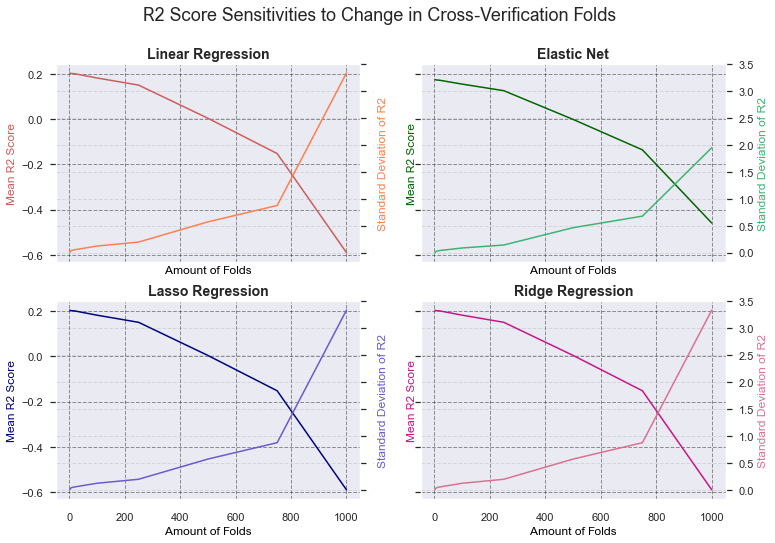

In [15]:
# 🚧 R2 SENSITIVITY ANALYSIS (To Cross-Validation Folds)

# Mean R2 Reaction to higher cross-validation folds
splits = [2, 5, 10, 20, 100, 250, 500, 750, 1000]

### Linear Regression
meanscore_linreg = []

for i in splits:
        kfold = KFold(n_splits=i, random_state=11, shuffle=True) 
        scores = cross_val_score(estimator=LinearRegression(), X=df_x, y=df_y, cv=kfold, scoring='r2')
        meanscore_linreg.append(scores.mean())

### Elastic Net
meanscore_elasticnet = []

for i in splits:
        kfold = KFold(n_splits=i, random_state=11, shuffle=True) 
        scores = cross_val_score(estimator=ElasticNet(), X=df_x, y=df_y, cv=kfold, scoring='r2')
        meanscore_elasticnet.append(scores.mean())

### Lasso Regression
meanscore_lassoreg = []

for i in splits:
        kfold = KFold(n_splits=i, random_state=11, shuffle=True) 
        scores = cross_val_score(estimator=Lasso(), X=df_x, y=df_y, cv=kfold, scoring='r2')
        meanscore_lassoreg.append(scores.mean())

### Ridge Regression
meanscore_ridgereg = []

for i in splits:
        kfold = KFold(n_splits=i, random_state=11, shuffle=True) 
        scores = cross_val_score(estimator=Ridge(), X=df_x, y=df_y, cv=kfold, scoring='r2')
        meanscore_ridgereg.append(scores.mean())

### Put it all in a dataframe
df_r2sensitivity=pd.DataFrame()

df_r2sensitivity['Linear Regression'] = meanscore_linreg
df_r2sensitivity['Elastic Net'] = meanscore_elasticnet
df_r2sensitivity['Lasso Regression'] = meanscore_lassoreg
df_r2sensitivity['Ridge Regression'] = meanscore_ridgereg

# Std of R2 per cross-validation fold

splits = [2, 5, 10, 20, 100, 250, 500, 750, 1000]

### Linear Regression
meanstd_linreg = []

for i in splits:
        kfold = KFold(n_splits=i, random_state=11, shuffle=True) 
        scores = cross_val_score(estimator=LinearRegression(), X=df_x, y=df_y, cv=kfold, scoring='r2')
        meanstd_linreg.append(scores.std())

### Elastic Net
meanstd_elasticnet = []

for i in splits:
        kfold = KFold(n_splits=i, random_state=11, shuffle=True) 
        scores = cross_val_score(estimator=ElasticNet(), X=df_x, y=df_y, cv=kfold, scoring='r2')
        meanstd_elasticnet.append(scores.std())

### Lasso Regression
meanstd_lassoreg = []

for i in splits:
        kfold = KFold(n_splits=i, random_state=11, shuffle=True) 
        scores = cross_val_score(estimator=Lasso(), X=df_x, y=df_y, cv=kfold, scoring='r2')
        meanstd_lassoreg.append(scores.std())

### Ridge Regression
meanstd_ridgereg = []

for i in splits:
        kfold = KFold(n_splits=i, random_state=11, shuffle=True) 
        scores = cross_val_score(estimator=Ridge(), X=df_x, y=df_y, cv=kfold, scoring='r2')
        meanstd_ridgereg.append(scores.std())

### Put it all in a dataframe
df_std_sensitivity=pd.DataFrame()

df_std_sensitivity['Linear Regression'] = meanstd_linreg
df_std_sensitivity['Elastic Net'] = meanstd_elasticnet
df_std_sensitivity['Lasso Regression'] = meanstd_lassoreg
df_std_sensitivity['Ridge Regression'] = meanstd_ridgereg

# Visualization
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

f.suptitle('R2 Score Sensitivities to Change in Cross-Verification Folds', size=18, font='Arial Nova')

ax1.plot(splits, df_r2sensitivity['Linear Regression'], color='indianred')
ax1b = ax1.twinx()
ax1b.plot(splits, df_std_sensitivity['Linear Regression'], color='coral')
ax1.set_xlabel('Amount of Folds', font='Arial Nova', color='black')
ax1.set_ylabel('Mean R2 Score', font='Arial Nova', color='indianred')
ax1b.set_ylabel('Standard Deviation of R2', color='coral')
ax1b.set_yticklabels('Standard Deviation of R2', color='slateblue', fontsize=0)

ax2.plot(splits, df_r2sensitivity['Elastic Net'], color='darkgreen')
ax2b = ax2.twinx()
ax2b.plot(splits, df_std_sensitivity['Elastic Net'], color='mediumseagreen')
ax2.set_xlabel('Amount of Folds', font='Arial Nova', color='black')
ax2.set_ylabel('Mean R2 Score', font='Arial Nova', color='darkgreen')
ax2b.set_ylabel('Standard Deviation of R2', color='mediumseagreen')

ax3.plot(splits, df_r2sensitivity['Lasso Regression'],  color='navy')
ax3b = ax3.twinx()
ax3b.plot(splits, df_std_sensitivity['Lasso Regression'], color='slateblue')
ax3.set_xlabel('Amount of Folds', font='Arial Nova', color='black')
ax3.set_ylabel('Mean R2 Score', font='Arial Nova', color='navy')
ax3b.set_ylabel('Standard Deviation of R2', color='slateblue')
ax3b.set_yticklabels('Standard Deviation of R2', color='slateblue', fontsize=0)

ax4.plot(splits, df_r2sensitivity['Ridge Regression'],  color='mediumvioletred')
ax4b = ax4.twinx()
ax4b.plot(splits, df_std_sensitivity['Ridge Regression'], color='palevioletred')
ax4.set_xlabel('Amount of Folds', font='Arial Nova', color='black')
ax4.set_ylabel('Mean R2 Score', font='Arial Nova', color='mediumvioletred')
ax4b.set_ylabel('Standard Deviation of R2', color='palevioletred')

ax1.set_title('Linear Regression', fontweight='bold', size='14')
ax2.set_title('Elastic Net', fontweight='bold', size='14')
ax3.set_title('Lasso Regression', fontweight='bold', size='14')
ax4.set_title('Ridge Regression', fontweight='bold', size='14')

ax1.get_shared_y_axes().join(ax1b, ax2b, ax3b, ax4b)

sns.set(style='dark')

axes = [ax1, ax2, ax3, ax4]
b_axes = [ax1b, ax2b, ax3b, ax4b]

for i in axes: 
    i.grid(color="black", which = "major", linestyle = "--", linewidth = 1, alpha = 0.4)

for i in b_axes: 
    i.grid(color="grey", which = "major", linestyle = "--", linewidth = 1, alpha = 0.2)

C:\Users\laure\AppData\Local\Temp\ipykernel_9468\971295053.py:15: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_results.style.set_precision(0)


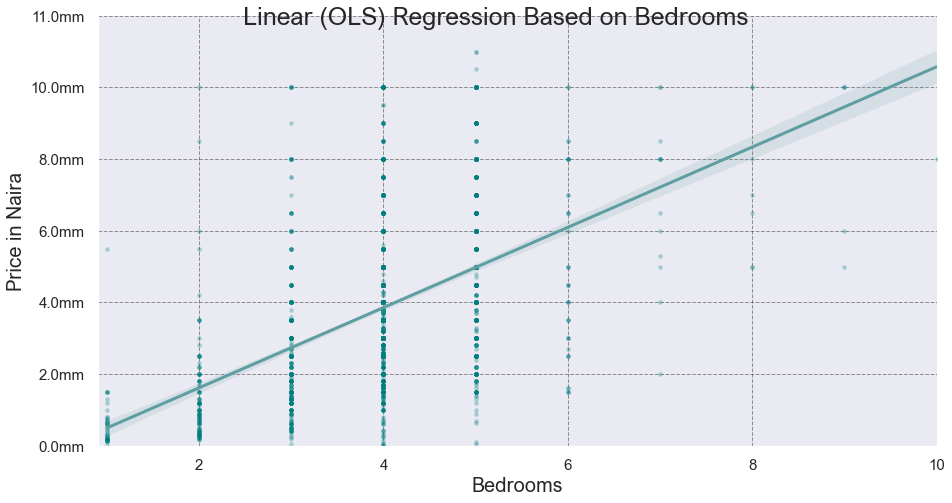

In [16]:
# 🚧 VISUALIZATION
# Let's also briefly visualize the linear regression plot for bedrooms as the feature. 
 
X_train, X_test, y_train, y_test = train_test_split(df[['Bedrooms']], df[['Price']], random_state=11)

ols = LinearRegression()
ols.fit(X_train, y_train)


# Results to DataFrame
df_results = pd.DataFrame()
df_results['Expected'] = pd.DataFrame(y_train)
df_results['Features'] = pd.DataFrame(X_train)
df_results['Predicted'] = pd.DataFrame(ols.predict(X_train)).apply(lambda x: '%.5f' % x, axis=1)
df_results.style.set_precision(0)

df_results.dropna(inplace=True)


import matplotlib.ticker as tkr
ax = sns.lmplot(data=df_results, x='Features', y='Expected', height=7, aspect= 1.8, line_kws={'color': 'cadetblue', 'lw': 3}, scatter_kws={'color': 'teal', 'alpha': 0.3, 's':20})

sns.set(style="darkgrid")
plt.grid(color="black", which = "major", linestyle = "--", linewidth = 1, alpha = 0.4)

ax.fig.suptitle('Linear (OLS) Regression Based on Bedrooms', size=25, font='Arial Nova', y=0.97)
ax.set_xlabels('Bedrooms', font='Arial Nova', size='20')
ax.set_ylabels('Price in Naira', font='Arial Nova', size='20')
sns.set_context("poster")


yticklabels=[0, 0, 2, 4, 6, 8, 10, 11]
ylabels = ['{:,.1f}'.format(y) + 'mm' for y in yticklabels]
ax.set_yticklabels(ylabels, size=15)
ax.set_xticklabels(size=15)

ax.set(ylim=(0, None))
ax.set(xlim=(0.9, 10))

#### Multivariate Regression

##### Non-Polynomial

In [17]:
# 🚧 MULTIVARIATE REGRESSION

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

# Estimators
estimators = {
    'LinRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

# Splitting Training/Testing Data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Price', 'Unnamed: 0','Unnamed: 0.1','Price_log','Area_dummy_1', 'State', 'Area', 'Microlocation', 'location_append', 'Longitude', 'Latitude','geometry', 'distances_of_area_from_center', 'Area_dummy_2'], inplace=False), df['Price'], random_state=11)

# Fitting
ols = LinearRegression()
ols.fit(X_train, y_train)

# Metrics
r2_mv = metrics.r2_score(pd.DataFrame(y_train), pd.DataFrame(ols.predict(X_train)))
mse_mv= metrics.mean_squared_error(pd.DataFrame(y_train), pd.DataFrame(ols.predict(X_train)))
mae_mv = metrics.mean_absolute_error(pd.DataFrame(y_train), pd.DataFrame(ols.predict(X_train)))

# Metrics for K-Fold cross validation
for estimator_name, estimator_object in estimators.items(): 
    kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=estimator_object, X=X_test, y=y_test, cv=kfold, scoring='r2')
    print(f'{estimator_name:>20}: mean r2 = {scores.mean():.1%}; standard deviation = {scores.std():.1%}')

       LinRegression: mean r2 = 20.3%; standard deviation = 7.1%
          ElasticNet: mean r2 = 15.4%; standard deviation = 5.7%
               Lasso: mean r2 = 20.3%; standard deviation = 7.1%
               Ridge: mean r2 = 20.3%; standard deviation = 7.0%


In [18]:
# 🚧 TUNING A MULTIVARIATE RIDGE REGRESSION
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from sklearn import metrics

# Tuning Solvers
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Price', 'Unnamed: 0','Unnamed: 0.1','Price_log','Area_dummy_1', 'State', 'Area', 'Microlocation', 'location_append', 'Longitude', 'Latitude','geometry', 'distances_of_area_from_center', 'Area_dummy_2'], inplace=False), df['Price'], random_state=11)

params = {'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

r2_score = []

for k, v in params.items():
    for val in v:
        ridge = Ridge().set_params(**{'alpha':0, k:val})
        ridge.fit(X_train, y_train)
        r2_ridge = metrics.r2_score(y_test, ridge.predict(X_test))
        r2_score.append(r2_ridge)

solvers = pd.DataFrame() 
solvers['solver'] = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
solvers['r2'] = r2_score

# Tuning Iterations

alphas = [0, 0.1, 0.25, 0.5, 1, 1.5, 3, 5, 10, 20, 25]

r2_score_alpha = []

for i in alphas: 
    ridge = Ridge().set_params(**{'alpha':i})
    ridge.fit(X_train, y_train)
    r2_ridge = metrics.r2_score(y_test, ridge.predict(X_test))
    r2_score_alpha.append(r2_ridge)

alphas_df = pd.DataFrame() 
alphas_df['iterations'] = [0, 0.1, 0.25, 0.5, 1, 1.5, 3, 5, 10, 20, 25]
alphas_df['r2'] = r2_score_alpha

solvers



,solver,r2
0,auto,0.213349
1,svd,0.213349
2,cholesky,0.213349
3,lsqr,0.213564
4,sparse_cg,0.213349
5,sag,0.213327
6,saga,0.213355


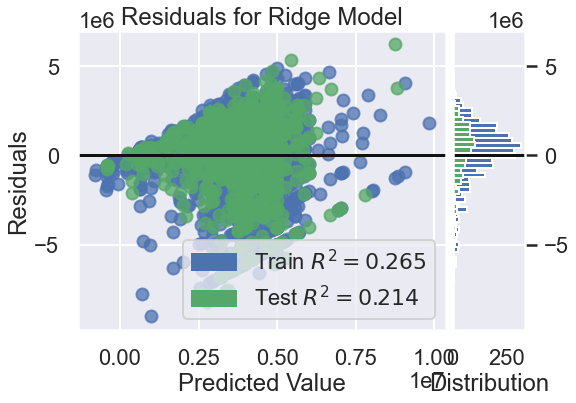

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


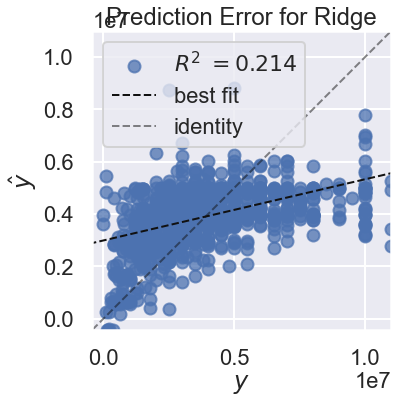

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [19]:
# # 🚧 VISUALIZATIONS FOR RIDGE REGRESSION

# # Assign Model to a variable
model = Ridge().set_params(**{'alpha':0, k:val, 'solver':'lsqr'})

# # Residuals Plot
vis_res = ResidualsPlot(model)
vis_res.fit(X_train, y_train)  
vis_res.score(X_test, y_test)  
vis_res.poof()

# Prediction Error Plot
vis_pe = PredictionError(model)
vis_pe.fit(X_train, y_train)  
vis_pe.score(X_test, y_test)  
vis_pe.poof()

##### Polynomial 

In [20]:
# 🚧 TRYING A POLYNOMIAL OLS LINEAR REGRESSION 
from sklearn.preprocessing import PolynomialFeatures


# Testing out the optimal number of polynomial degrees 
range = np.arange(2, 8)

poly_scores = pd.DataFrame()
poly_scores['poly degrees'] = range
r2scores_training = []
r2scores_testing = []

# training

for i in range: 
    nupoly = PolynomialFeatures(i, include_bias=False)
    nuX_train = nupoly.fit_transform(X_train)
    nuOLS = LinearRegression()
    nuOLS.fit(nuX_train, y_train)
    r2 = metrics.r2_score(y_train, nuOLS.predict(nuX_train))
    r2scores_training.append(r2)



r2scores_training


[0.29208005458776576,
 0.312504703347419,
 0.3408873538454197,
 0.36511462279343776,
 0.37224485568836085,
 0.18371409377735815]

In [21]:
# Testing out the model's sensitivity to CV folds
range = np.arange(7, 11)
score_poly_cv = pd.DataFrame()
score_poly_cv['poly degree'] = range
meanscoreslist = []

for i in range: 
    nupoly = PolynomialFeatures(2, include_bias=False)
    X_poly = nupoly.fit_transform(df.drop(columns=['Price', 'Unnamed: 0','Unnamed: 0.1','Price_log','Area_dummy_1', 'State', 'Area', 'Microlocation', 'location_append', 'Longitude', 'Latitude','geometry', 'distances_of_area_from_center', 'Area_dummy_2'], inplace=False))
    kfold = KFold(n_splits=i, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=LinearRegression(), X=X_poly, y=df['Price'], cv=kfold, scoring='r2')
    meanscoreslist.append(scores.mean())
    
score_poly_cv['mean r2 score'] = meanscoreslist
score_poly_cv

,poly degree,mean r2 score
0,7,0.257017
1,8,0.255927
2,9,0.259007
3,10,0.256853


In [22]:
# 🚧 POLYNOMIAL RIDGE REGRESSION 

nupoly = PolynomialFeatures(3, include_bias=False)
X_poly = nupoly.fit_transform(df.drop(columns=['Price', 'Unnamed: 0','Unnamed: 0.1','Price_log','Area_dummy_1', 'State', 'Area', 'Microlocation', 'location_append', 'Longitude', 'Latitude','geometry', 'distances_of_area_from_center', 'Area_dummy_2'], inplace=False))
kfold = KFold(n_splits=7, random_state=11, shuffle=True) 
scores = cross_val_score(estimator=Ridge(), X=X_poly, y=df['Price'], cv=kfold, scoring='r2')

scores.mean()

0.2359177452223141

In [23]:
# 🚧 TUNING RIDGE
range = np.arange(2, 7)
score_poly_cv = pd.DataFrame()
score_poly_cv['poly degree'] = range
meanscoreslist = []

for i in range: 
    nupoly = PolynomialFeatures(i, include_bias=False)
    X_poly = nupoly.fit_transform(df.drop(columns=['Price', 'Unnamed: 0','Unnamed: 0.1','Price_log','Area_dummy_1', 'State', 'Area', 'Microlocation', 'location_append', 'Longitude', 'Latitude','geometry', 'distances_of_area_from_center', 'Area_dummy_2'], inplace=False))
    kfold = KFold(n_splits=8, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=Ridge(), X=X_poly, y=df['Price'], cv=kfold, scoring='r2')
    meanscoreslist.append(scores.mean())
    
score_poly_cv['mean r2 score'] = meanscoreslist
score_poly_cv

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.09908e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


,poly degree,mean r2 score
0,2,0.256713
1,3,0.238353
2,4,-0.044924
3,5,-8.213990
4,6,-120.754018


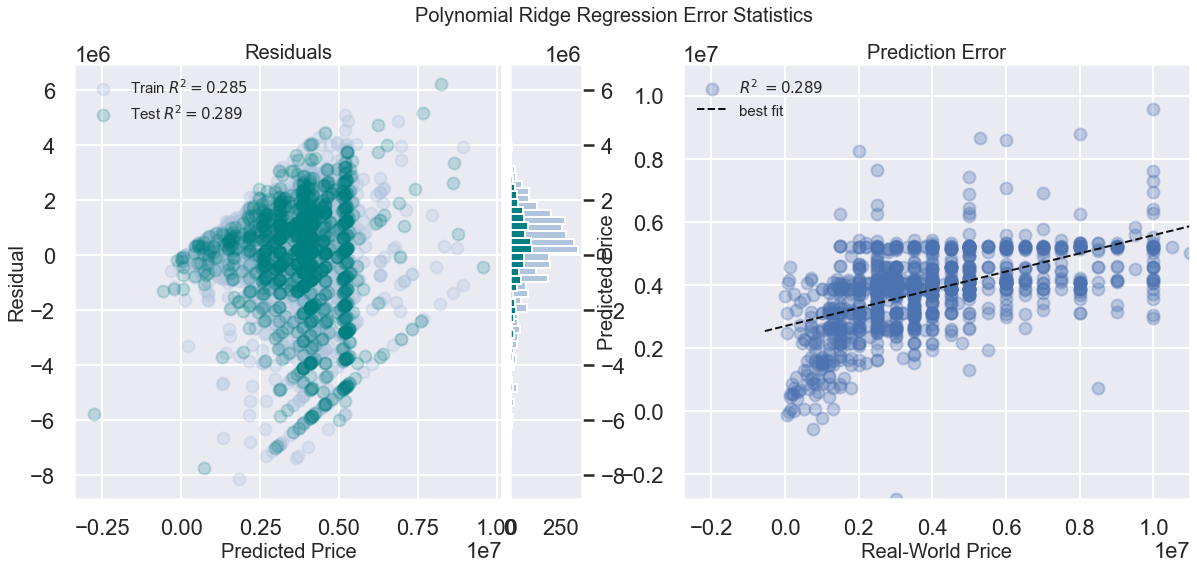

In [24]:
# # 🚧 VISUALIZATIONS FOR POLYNOMIAL RIDGE REGRESSION 

# WRITE OUT THE BEST LINEAR REGRESSION

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Price', 'Unnamed: 0','Unnamed: 0.1','Price_log','Area_dummy_1', 'State', 'Area', 'Microlocation', 'location_append', 'Longitude', 'Latitude','geometry', 'distances_of_area_from_center', 'Area_dummy_2'], inplace=False), df['Price'], random_state=1)
X_trainpoly = PolynomialFeatures(3, include_bias=False).fit_transform(X_train)
X_testpoly = PolynomialFeatures(3, include_bias=False).fit_transform(X_test)


# # Assign Model to a variable
model = Ridge()

## Overall Plot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
f.suptitle("Polynomial Ridge Regression Error Statistics", size=20)

# Residuals Plot
ax1.set_title("Residuals", fontsize=20)
vis_res = ResidualsPlot(model, qqplot=False, hist=True, train_color='lightsteelblue', test_color='teal', test_alpha=0.2, train_alpha=0.3, ax=ax1, linecolor='b')
vis_res.fit(X_trainpoly, y_train)  
vis_res.score(X_testpoly, y_test)  
ax1.set_xlabel("Predicted Price", size=20)
ax1.set_ylabel("Residual", size=20)
ax1.legend(fontsize=15)
sns.set_style("darkgrid")
ax1.grid(color="white")



# Prediction Error Plot
ax2.set_title("Prediction Error", fontsize=20)
from yellowbrick import set_palette
set_palette('sns_colorblind')
vis_pe = PredictionError(model, alpha=0.3, ax=ax2, identity=True)
vis_pe.fit(X_trainpoly, y_train)  
vis_pe.score(X_testpoly, y_test) 
ax2.set_xlabel("Real-World Price", size=20)
ax2.set_ylabel("Predicted Price", size=20)
ax2.legend(fontsize=15) 
ax2.grid(color="white")


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


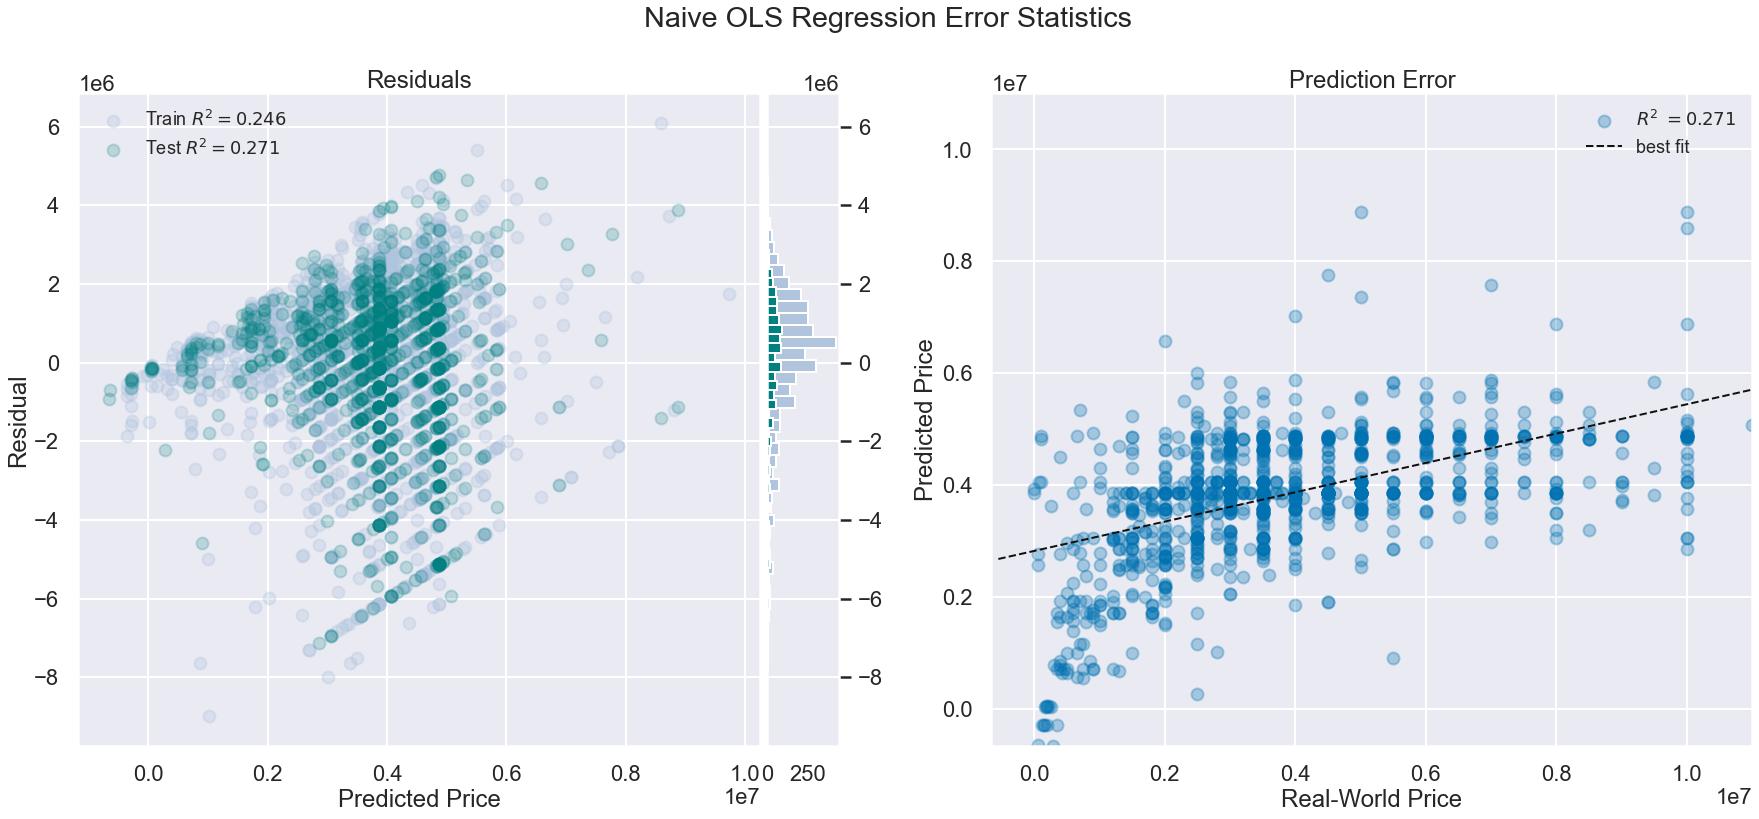

In [25]:
# 🚧 SIMILAR VISUALIZATIONS FOR NAIVE LINEAR MODEL 

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Price', 'Unnamed: 0','Unnamed: 0.1','Price_log','Area_dummy_1', 'State', 'Area', 'Microlocation', 'location_append', 'Longitude', 'Latitude','geometry', 'distances_of_area_from_center', 'Area_dummy_2'], inplace=False), df['Price'], random_state=2)

# # Assign Model to a variable
model = LinearRegression()

## Overall Plot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12))
f.suptitle("Naive OLS Regression Error Statistics")

# Residuals Plot
ax1.title.set_text("Residuals")
vis_res = ResidualsPlot(model, qqplot=False, hist=True, train_color='lightsteelblue', test_color='teal', test_alpha=0.2, train_alpha=0.3, ax=ax1, linecolor='b')
vis_res.fit(X_train, y_train)  
vis_res.score(X_test, y_test)  
ax1.set_xlabel("Predicted Price")
ax1.set_ylabel("Residual")
ax1.legend(fontsize=18)
sns.set_style("darkgrid")
ax1.grid(color="white")


# Prediction Error Plot
ax2.title.set_text("Prediction Error")
from yellowbrick import set_palette
set_palette('sns_colorblind')
vis_pe = PredictionError(model, alpha=0.3, ax=ax2, identity=True)
vis_pe.fit(X_train, y_train)  
vis_pe.score(X_test, y_test) 
ax2.set_xlabel("Real-World Price")
ax2.set_ylabel("Predicted Price")
ax2.legend(fontsize=18) 
ax2.grid(color="white")

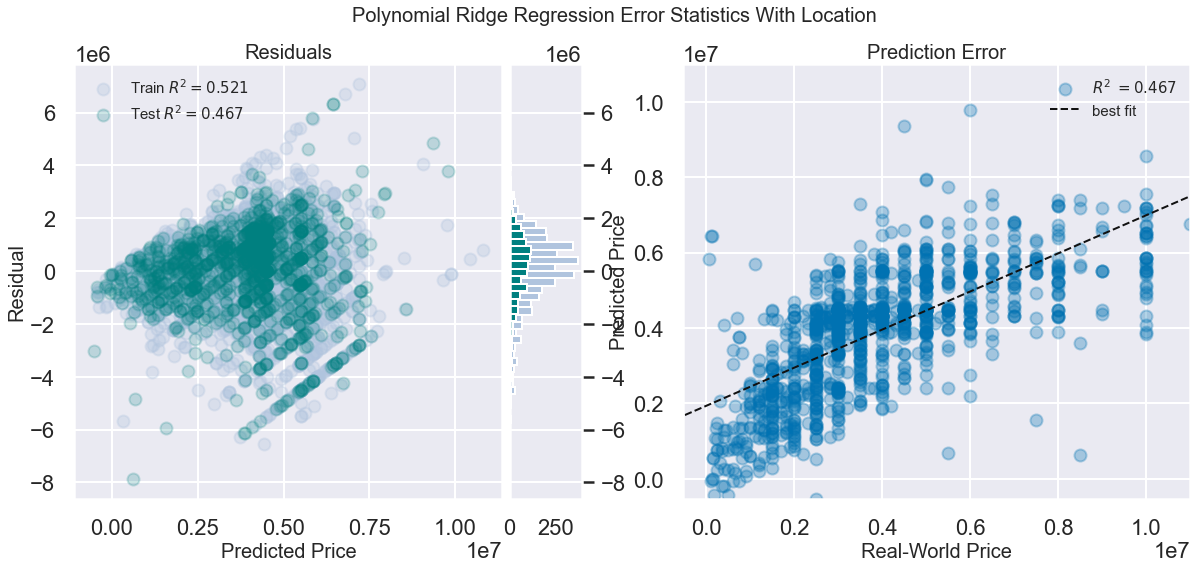

In [26]:
# # 🚧 VISUALIZATIONS FOR GEOGRAPHICAL RIDGE REGRESSION

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Price', 'Unnamed: 0','Unnamed: 0.1','Price_log','Area_dummy_1', 'State', 'Area', 'Microlocation', 'location_append', 'Longitude', 'Latitude','geometry', 'distances_of_area_from_center'], inplace=False), df['Price'], random_state=8)
X_trainpoly = PolynomialFeatures(2, include_bias=False).fit_transform(X_train)
X_testpoly = PolynomialFeatures(2, include_bias=False).fit_transform(X_test)


# # Assign Model to a variable
model = Ridge()

## Overall Plot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
f.suptitle("Polynomial Ridge Regression Error Statistics With Location", size=20)

# Residuals Plot
ax1.set_title("Residuals", fontsize=20)
vis_res = ResidualsPlot(model, qqplot=False, hist=True, train_color='lightsteelblue', test_color='teal', test_alpha=0.2, train_alpha=0.3, ax=ax1, linecolor='b')
vis_res.fit(X_trainpoly, y_train)  
vis_res.score(X_testpoly, y_test)  
ax1.set_xlabel("Predicted Price", size=20)
ax1.set_ylabel("Residual", size=20)
ax1.legend(fontsize=15)
sns.set_style("darkgrid")
ax1.grid(color="white")


# Prediction Error Plot
ax2.set_title("Prediction Error", fontsize=20)
from yellowbrick import set_palette
set_palette('sns_colorblind')
vis_pe = PredictionError(model, alpha=0.3, ax=ax2, identity=True)
vis_pe.fit(X_trainpoly, y_train)  
vis_pe.score(X_testpoly, y_test) 
ax2.set_xlabel("Real-World Price", size=20)
ax2.set_ylabel("Predicted Price", size=20)
ax2.legend(fontsize=15) 
ax2.grid(color="white")
